In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [4]:
df.tail()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82
31998,EXA031999,none,male,some high school,standard,Section C,51,92,82


In [5]:
df.describe()

,practical score,viva score,exam score
count,31999.000000,31999.000000,31999.000000
mean,67.839870,70.375168,69.139598
std,15.229898,14.092764,15.009974
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  object
 2   gender                       31999 non-null  object
 3   parental level of education  31999 non-null  object
 4   lunch                        31999 non-null  object
 5   Section                      31999 non-null  object
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


In [7]:
df.shape

(31999, 9)

In [9]:
df.isnull().sum()

,0
Roll no,0
test preparation,0
gender,0
parental level of education,0
lunch,0
Section,0
practical score,0
viva score,0
exam score,0


In [14]:
df[0:].duplicated().sum()

0

In [15]:
df.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')

In [16]:
df.dtypes.value_counts()

,count
object,6
int64,3


In [22]:
df.value_counts(df['gender'])

,count
gender,
female,16031
male,15968


In [23]:
df.value_counts(df['parental level of education'])

,count
parental level of education,
some college,7083
high school,6836
associate's degree,6556
some high school,5471
bachelor's degree,3341
master's degree,2712


In [24]:
df.value_counts(df['Section'])

,count
Section,
Section C,10323
Section D,8214
Section B,6408
Section E,4555
Section A,2499


In [25]:
np.max(df['exam score'])

100

In [26]:
np.min(df['exam score'])

15

In [27]:
top10=df.nlargest(10,'exam score')[['Roll no','exam score']]
top10

,Roll no,exam score
102,EXA000103,100
143,EXA000144,100
279,EXA000280,100
365,EXA000366,100
376,EXA000377,100
459,EXA000460,100
553,EXA000554,100
719,EXA000720,100
796,EXA000797,100
822,EXA000823,100


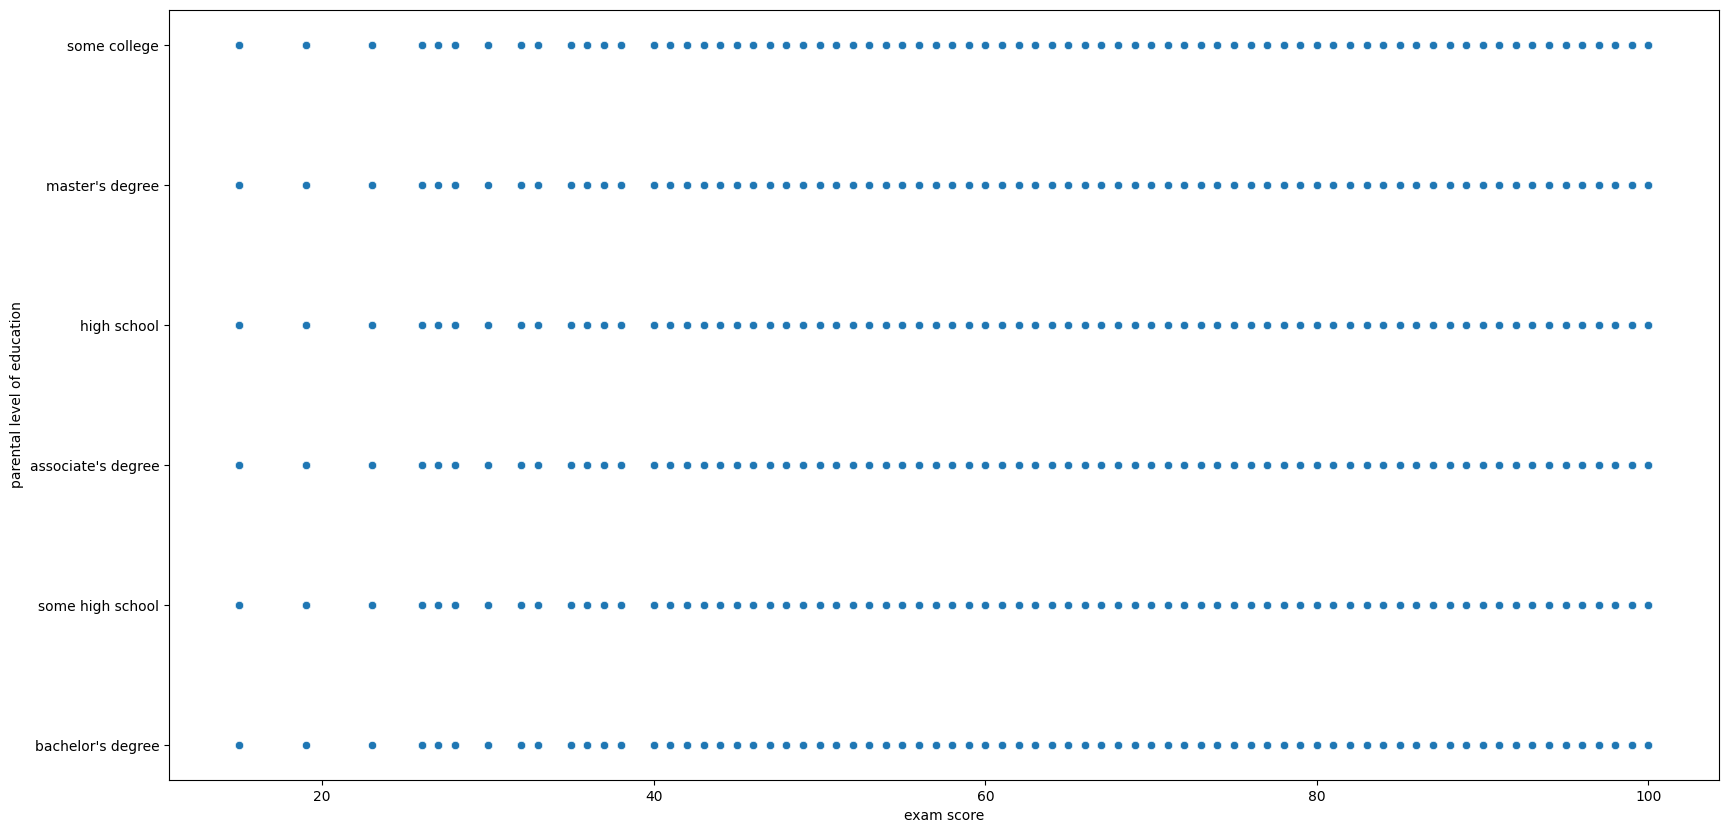

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='exam score',y='parental level of education',data=df)
plt.show()

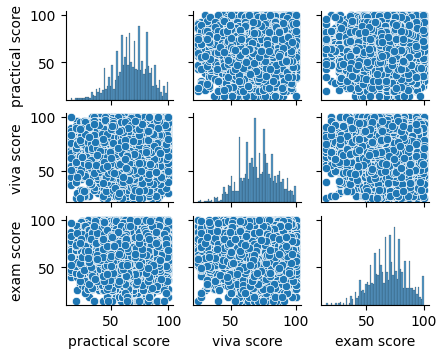

In [31]:
sns.pairplot(df, height=1.2, aspect=1.25)
plt.savefig('pariplot.png');

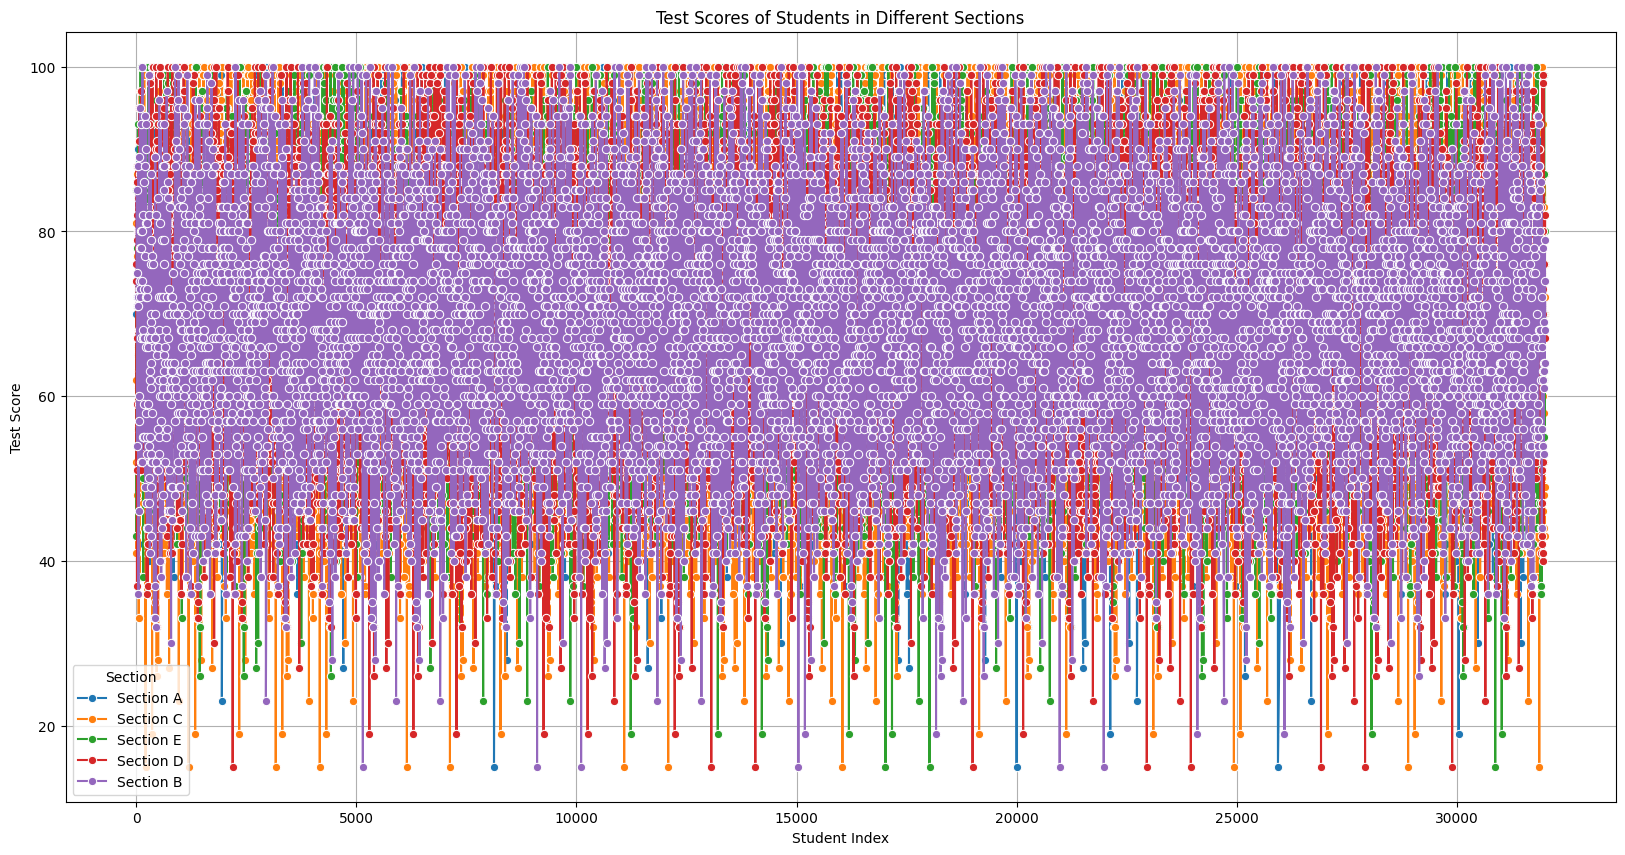

In [47]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x=df.index, y='exam score', hue='Section', marker='o')
plt.title('Test Scores of Students in Different Sections')
plt.xlabel('Student Index')
plt.ylabel('Test Score')
plt.legend(title='Section')
plt.grid(True)
plt.show()

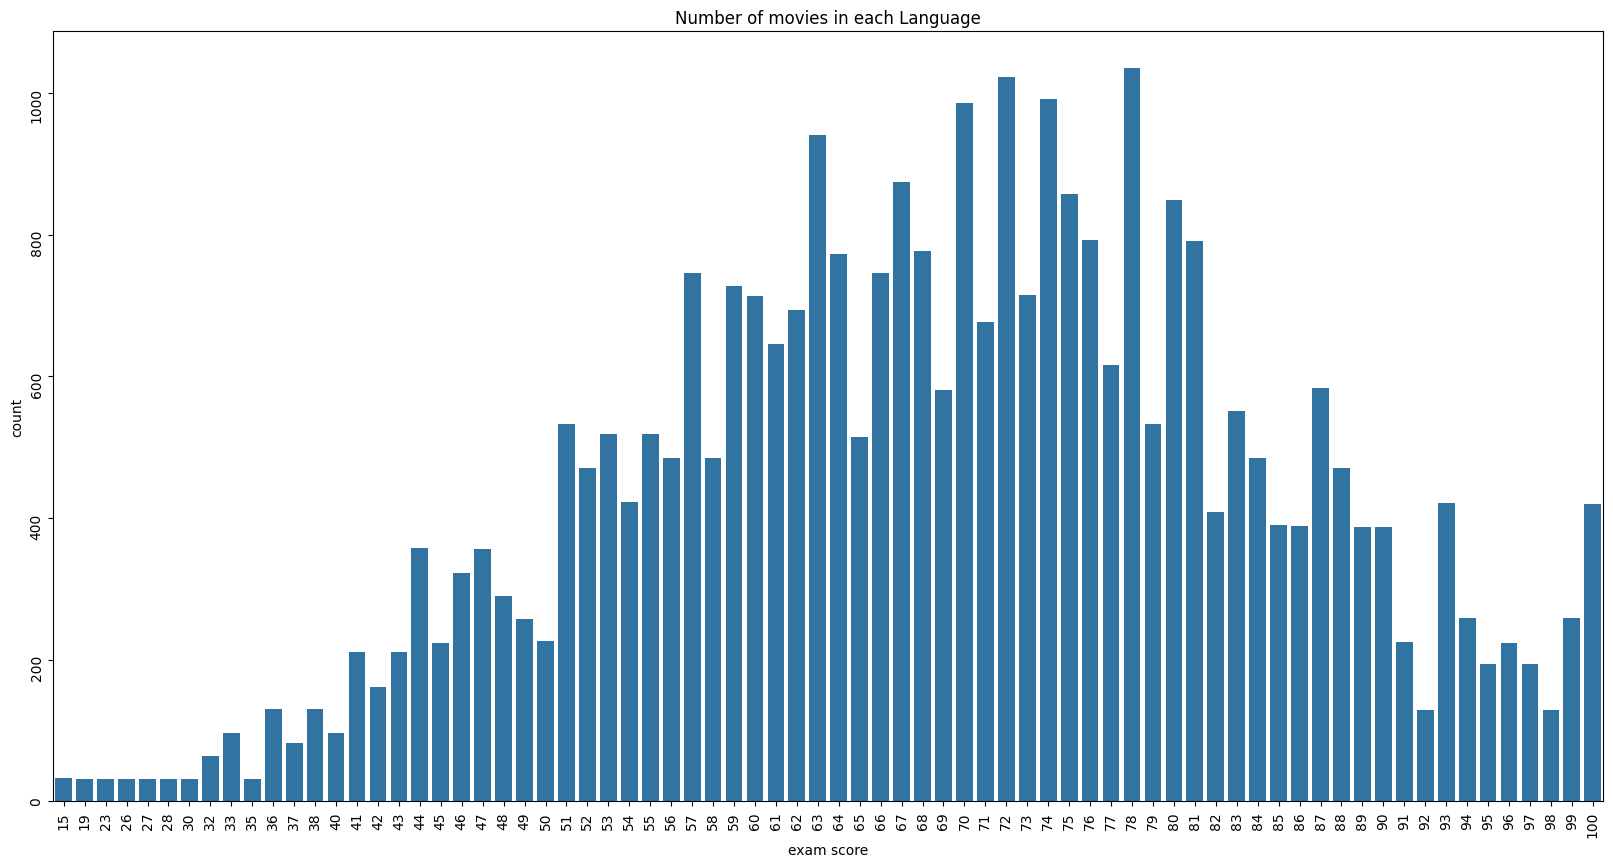

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='exam score',data=df)
plt.tick_params(rotation=90)
plt.title("Number of movies in each Language")
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
cols=['parental level of education','lunch','Section','gender','test preparation ','Roll no']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  int64 
 2   gender                       31999 non-null  int64 
 3   parental level of education  31999 non-null  int64 
 4   lunch                        31999 non-null  int64 
 5   Section                      31999 non-null  int64 
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 2.2+ MB


In [58]:
x=df.drop(['lunch','exam score'], axis=1)
y=df['exam score']

In [59]:
print(x)
print(y)

       Roll no  test preparation   gender  parental level of education  \
0            0                  1       1                            4   
1            1                  1       1                            3   
2            2                  1       1                            3   
3            3                  1       0                            4   
4            4                  1       0                            2   
...        ...                ...     ...                          ...   
31994    31994                  1       1                            5   
31995    31995                  1       0                            2   
31996    31996                  1       1                            1   
31997    31997                  1       1                            0   
31998    31998                  1       1                            5   

       Section  practical score  viva score  
0            0               70          73  
1            2     

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [70]:
rf = RandomForestRegressor(n_estimators=15,max_depth=15,random_state=0,criterion='squared_error')
rf.fit(x, y)

RandomForestRegressor(max_depth=15, n_estimators=15, random_state=0)

In [86]:
df_test=pd.read_csv('test.csv')

In [87]:
df_test.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62


In [78]:
df_test.shape

(100, 8)

In [88]:
from sklearn.preprocessing import LabelEncoder
cols=['parental level of education','lunch','Section','gender','test preparation ','Roll no']
df_test[cols]=df_test[cols].apply(LabelEncoder().fit_transform)

In [89]:
x_test=df.drop(['lunch','exam score'], axis=1)
y_test=df['exam score']

In [90]:
y_pred=rf.predict(x_test)

In [91]:
print(y_pred)

[70.29162393 51.33333333 43.4        ... 73.55615029 72.37906602
 72.16222541]


In [103]:
output = pd.DataFrame({ 'Roll no' : x_test['Roll no'], 'exam score':  y_pred})
output.to_csv('submission.csv', index=True)

In [104]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  12.896
